## Recommendation Systems

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

pd.set_option('display.max_columns',100)
#pd.set_option('display.max_rows',100)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format','{:.2f}'.format)
np.set_printoptions(suppress=True)

In [2]:
df = pd.read_csv("movielens.csv", encoding="ISO-8859-1")

In [3]:
df.head()

,movieId,title,year,genres,userId,rating,timestamp
0,31,Dangerous Minds,1995.00,Drama,1,2.50,1260759144
1,1029,Dumbo,1941.00,Animation|Children|Drama|Musical,1,3.00,1260759179
2,1061,Sleepers,1996.00,Thriller,1,3.00,1260759182
3,1129,Escape from New York,1981.00,Action|Adventure|Sci-Fi|Thriller,1,2.00,1260759185
4,1172,Cinema Paradiso (Nuovo cinema Paradiso),1989.00,Drama,1,4.00,1260759205


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100004 entries, 0 to 100003
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   movieId    100004 non-null  int64  
 1   title      99997 non-null   object 
 2   year       99997 non-null   float64
 3   genres     100004 non-null  object 
 4   userId     100004 non-null  int64  
 5   rating     100004 non-null  float64
 6   timestamp  100004 non-null  int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 5.3+ MB


In [5]:
df.shape

(100004, 7)

In [6]:
df.describe()

,movieId,year,userId,rating,timestamp
count,100004.00,99997.00,100004.00,100004.00,100004.00
mean,12548.66,1991.83,347.01,3.54,1129639086.94
std,26369.20,15.09,195.16,1.06,191685826.03
min,1.00,1902.00,1.00,0.50,789652009.00
25%,1028.00,1987.00,182.00,3.00,965847824.00
50%,2406.50,1995.00,367.00,4.00,1110421822.00
75%,5418.00,2001.00,520.00,4.00,1296192495.50
max,163949.00,2016.00,671.00,5.00,1476640644.00


Compute the number of ratings for each movie and then plot it against the year the movie came out using a boxplot for each year. Use the square root transformation on the y-axis (number of ratings) when creating your plot.

In [7]:
noratings = pd.DataFrame(df.groupby(["movieId","year"])["rating"].count())
noratings

,,rating
movieId,year,
1,1995.00,247
2,1995.00,107
3,1995.00,59
4,1995.00,13
5,1995.00,56
...,...,...
161918,2016.00,1
161944,2001.00,1
162542,2016.00,1


In [8]:
noratings.reset_index(inplace=True)

In [9]:
noratings

,movieId,year,rating
0,1,1995.00,247
1,2,1995.00,107
2,3,1995.00,59
3,4,1995.00,13
4,5,1995.00,56
...,...,...,...
9056,161918,2016.00,1
9057,161944,2001.00,1
9058,162542,2016.00,1
9059,162672,2016.00,1


<Figure size 1440x2880 with 0 Axes>

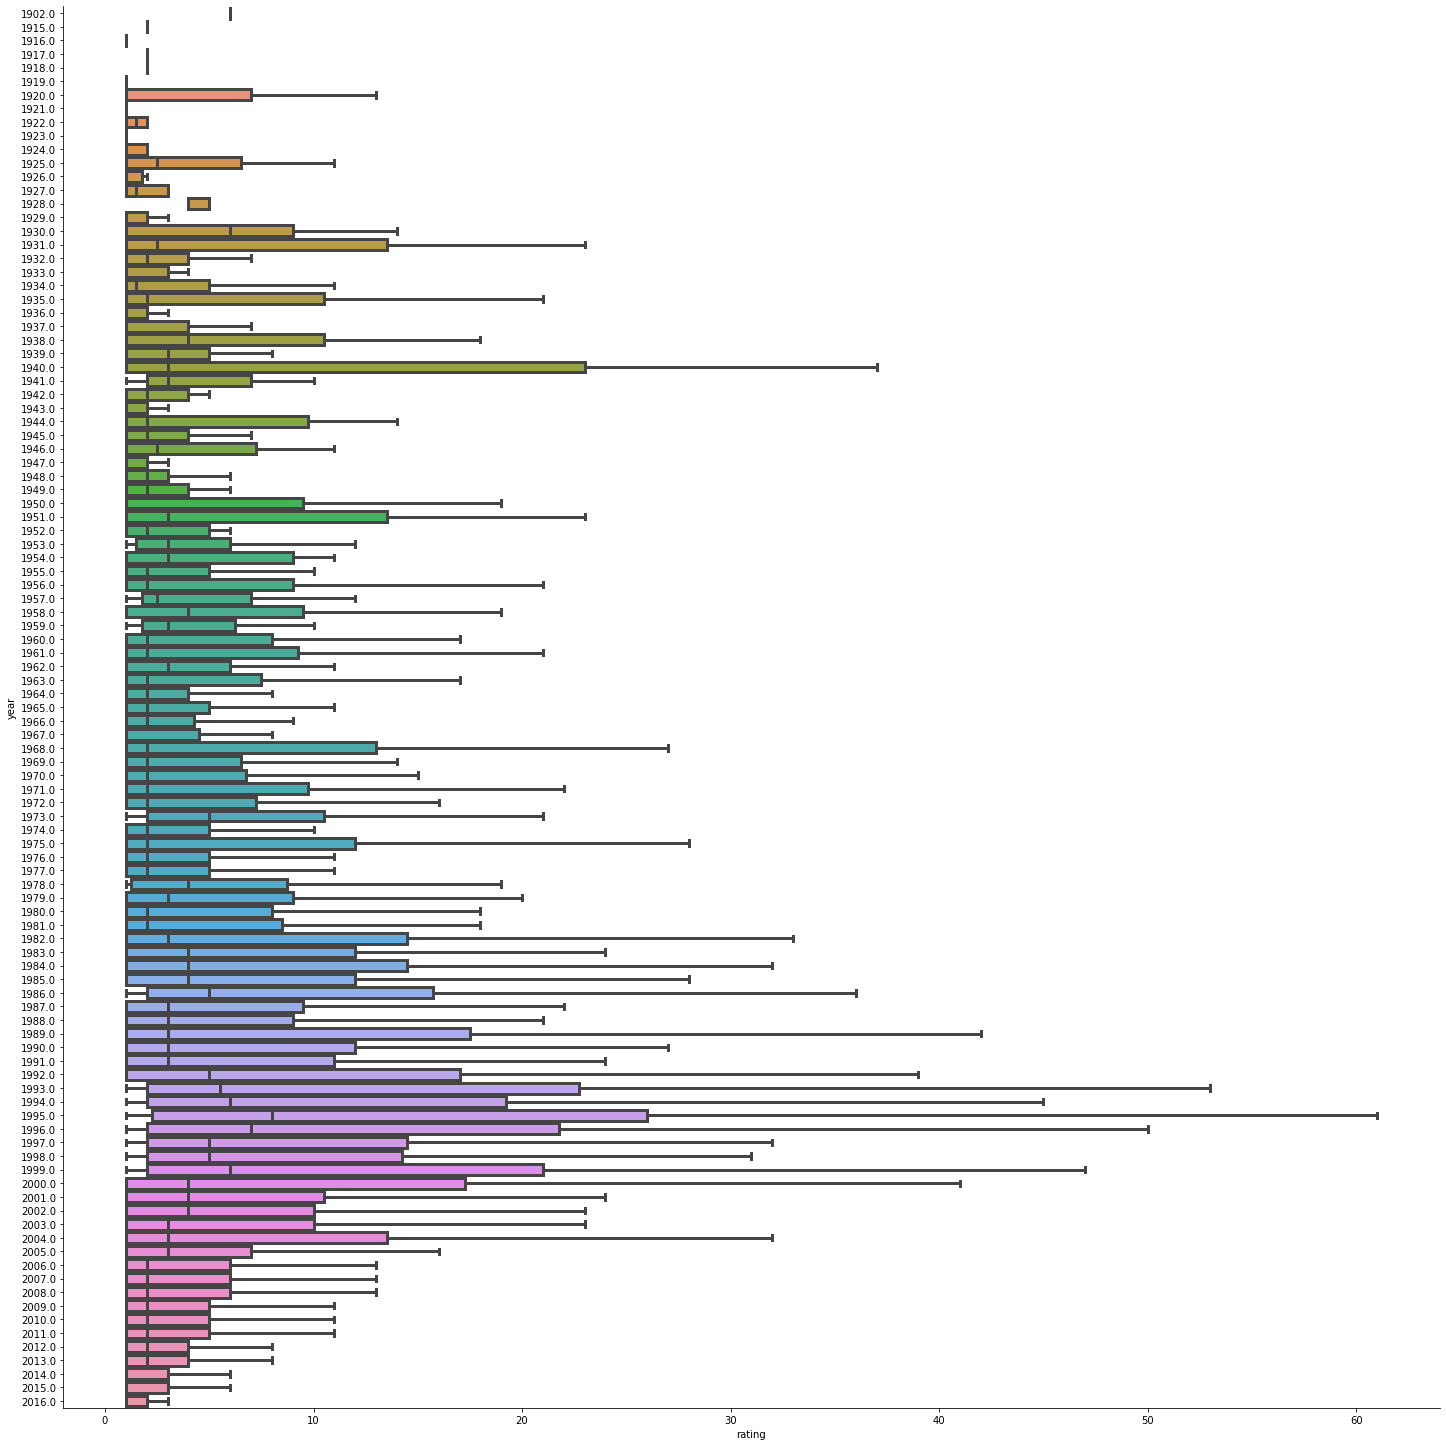

In [10]:
plt.figure(figsize=(20,40))

sns.catplot(x="rating", y="year",  ci=None,

                data=noratings, color=None, linewidth=3, showfliers = False,

                orient="h", height=20, aspect=1, palette=None,

                kind="box", dodge=True)

plt.show()

What year has the highest median number of ratings?

In [11]:
years = pd.DataFrame(noratings.groupby(["year","movieId"]).median())
years

rating
year    movieId        
1902.00 32898         6
1915.00 7065          2
1916.00 62383         1
1917.00 8511          2
1918.00 3309          2
...                 ...
2016.00 161594        1
        161918        1
        162542        1
        162672        1
        163949        1

[9061 rows x 1 columns]

In [12]:
#years.to_csv('years.csv')

We see that, on average, movies that came out after 1993 get more ratings. We also see that with newer movies, starting in 1993, the number of ratings decreases with year: the more recent a movie is, the less time users have had to rate it.

Among movies that came out in 1993 or later, select the top 25 movies with the highest average number of ratings per year (n/year), and caculate the average rating of each of them. To calculate number of ratings per year, use 2018 as the end year.

What is the average rating for the movie The Shawshank Redemption?

In [13]:
shaw = df[df['title'] == 'Shawshank Redemption, The']

In [14]:
shaw

,movieId,title,year,genres,userId,rating,timestamp
101,318,"Shawshank Redemption, The",1994.00,Crime|Drama,3,5.00,1298862121
511,318,"Shawshank Redemption, The",1994.00,Crime|Drama,7,5.00,851868187
591,318,"Shawshank Redemption, The",1994.00,Crime|Drama,8,5.00,1154464714
704,318,"Shawshank Redemption, The",1994.00,Crime|Drama,9,4.00,938628966
746,318,"Shawshank Redemption, The",1994.00,Crime|Drama,10,4.00,942766515
...,...,...,...,...,...,...,...
98764,318,"Shawshank Redemption, The",1994.00,Crime|Drama,664,4.50,1343731695
99297,318,"Shawshank Redemption, The",1994.00,Crime|Drama,665,5.00,995233192
99802,318,"Shawshank Redemption, The",1994.00,Crime|Drama,668,4.00,993613478
99867,318,"Shawshank Redemption, The",1994.00,Crime|Drama,670,5.00,938781934


In [15]:
shaw['rating'].mean() #What is the average rating for the movie The Shawshank Redemption?

4.487138263665595

What is the average number of ratings per year for the movie Forrest Gump?

In [16]:
forrest = df[df['title'] == 'Forrest Gump']

In [17]:
forrest

,movieId,title,year,genres,userId,rating,timestamp
57,356,Forrest Gump,1994.00,Comedy|Drama|Romance|War,2,3.00,835355628
103,356,Forrest Gump,1994.00,Comedy|Drama|Romance|War,3,5.00,1298862167
159,356,Forrest Gump,1994.00,Comedy|Drama|Romance|War,4,5.00,949919763
359,356,Forrest Gump,1994.00,Comedy|Drama|Romance|War,5,4.00,1163374152
516,356,Forrest Gump,1994.00,Comedy|Drama|Romance|War,7,3.00,851868188
...,...,...,...,...,...,...,...
98766,356,Forrest Gump,1994.00,Comedy|Drama|Romance|War,664,4.50,1343731916
99302,356,Forrest Gump,1994.00,Comedy|Drama|Romance|War,665,4.00,993179737
99712,356,Forrest Gump,1994.00,Comedy|Drama|Romance|War,666,5.00,838920959
99772,356,Forrest Gump,1994.00,Comedy|Drama|Romance|War,667,4.00,847271260


In [18]:
forrest['rating'].sum()

1382.5

In [19]:
forrest['rating'].count()

341

In [20]:
1382.5/341

4.05425219941349

From the table constructed in Q2, we can see that the most frequently rated movies tend to have above average ratings. This is not surprising: more people watch popular movies. To confirm this, stratify the post-1993 movies by ratings per year and compute their average ratings. To calculate number of ratings per year, use 2018 as the end year. Make a plot of average rating versus ratings per year and show an estimate of the trend.

In [21]:
df.year.value_counts()

1995.00    6635
1994.00    5861
1996.00    5109
1999.00    5034
1993.00    4214
           ... 
1918.00       2
1917.00       2
1915.00       2
1919.00       1
1916.00       1
Name: year, Length: 103, dtype: int64

In [22]:
post1993 = df[df["year"]>1993.0]

In [23]:
post1993

,movieId,title,year,genres,userId,rating,timestamp
0,31,Dangerous Minds,1995.00,Drama,1,2.50,1260759144
2,1061,Sleepers,1996.00,Thriller,1,3.00,1260759182
11,1405,Beavis and Butt-Head Do America,1996.00,Adventure|Animation|Comedy|Crime,1,1.00,1260759203
16,2294,Antz,1998.00,Adventure|Animation|Children|Comedy|Fantasy,1,2.00,1260759108
20,10,GoldenEye,1995.00,Action|Adventure|Thriller,2,4.00,835355493
...,...,...,...,...,...,...,...
99999,6268,Raising Victor Vargas,2002.00,Comedy|Drama|Romance,671,2.50,1065579370
100000,6269,Stevie,2002.00,Documentary,671,4.00,1065149201
100001,6365,"Matrix Reloaded, The",2003.00,Action|Adventure|Sci-Fi|Thriller|IMAX,671,4.00,1070940363
100002,6385,Whale Rider,2002.00,Drama,671,2.50,1070979663


In [24]:
post1993.groupby("year")["rating"].agg(["mean","count"])

,mean,count
year,,
1994.00,3.54,5861
1995.00,3.47,6635
1996.00,3.43,5109
1997.00,3.42,4060
1998.00,3.47,4019
1999.00,3.47,5034
2000.00,3.36,4054
2001.00,3.46,3442
2002.00,3.46,3090


In [25]:
df3 = pd.DataFrame(post1993.groupby("year")["rating"].agg(["mean","count"]))

In [26]:
df3

,mean,count
year,,
1994.00,3.54,5861
1995.00,3.47,6635
1996.00,3.43,5109
1997.00,3.42,4060
1998.00,3.47,4019
1999.00,3.47,5034
2000.00,3.36,4054
2001.00,3.46,3442
2002.00,3.46,3090


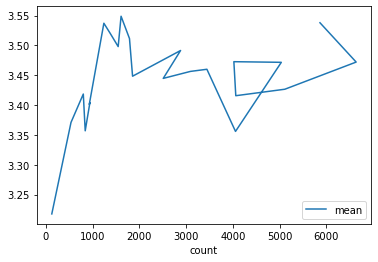

In [27]:
df3.plot(x="count",y="mean")
plt.show()

Suppose you are doing a predictive analysis in which you need to fill in the missing ratings with some value.

Given your observations in the exercise in Q3, which of the following strategies would be most appropriate?

Compute the average rating for each week and plot this average against date. Hint: use the round_date() function before you group_by()

The movielens data also has a genres column. This column includes every genre that applies to the movie. Some movies fall under several genres. Define a category as whatever combination appears in this column. Keep only categories with more than 1,000 ratings. Then compute the average and standard error for each category. Plot these as error bar plots.
Which genre has the lowest average rating?

In [28]:
df.groupby("genres")["rating"].sum()

genres
(no genres listed)                      68.00
Action                                 412.00
Action|Adventure                      2046.00
Action|Adventure|Animation              91.50
Action|Adventure|Animation|Children     53.50
                                        ...  
Sci-Fi|Thriller                        257.50
Sci-Fi|Thriller|IMAX                    28.00
Thriller                              2488.00
War                                     50.50
Western                                437.00
Name: rating, Length: 901, dtype: float64

In [29]:
df4 = pd.DataFrame(df.groupby("genres")["rating"].sum())

In [30]:
df4

,rating
genres,
(no genres listed),68.00
Action,412.00
Action|Adventure,2046.00
Action|Adventure|Animation,91.50
Action|Adventure|Animation|Children,53.50
...,...
Sci-Fi|Thriller,257.50
Sci-Fi|Thriller|IMAX,28.00
Thriller,2488.00


In [31]:
df5 = df4[df4["rating"]>1000]
df5

,rating
genres,
Action|Adventure,2046.00
Action|Adventure|Drama,1738.00
Action|Adventure|Fantasy,1587.50
Action|Adventure|Sci-Fi,7689.00
Action|Adventure|Sci-Fi|IMAX,1769.00
...,...
Horror|Sci-Fi|Thriller,1003.50
Horror|Thriller,1687.50
Mystery|Sci-Fi|Thriller,1047.00


In [32]:
df5.sort_values(by="rating")

,rating
genres,
Horror|Sci-Fi|Thriller,1003.50
Drama|Romance|War,1017.00
Animation|Children|Fantasy|Musical,1037.00
Drama|Horror|Thriller,1037.00
Adventure|Animation|Children|Comedy|Musical,1045.50
...,...
Comedy|Drama,11868.50
Drama|Romance,12669.00
Comedy|Romance,13388.50


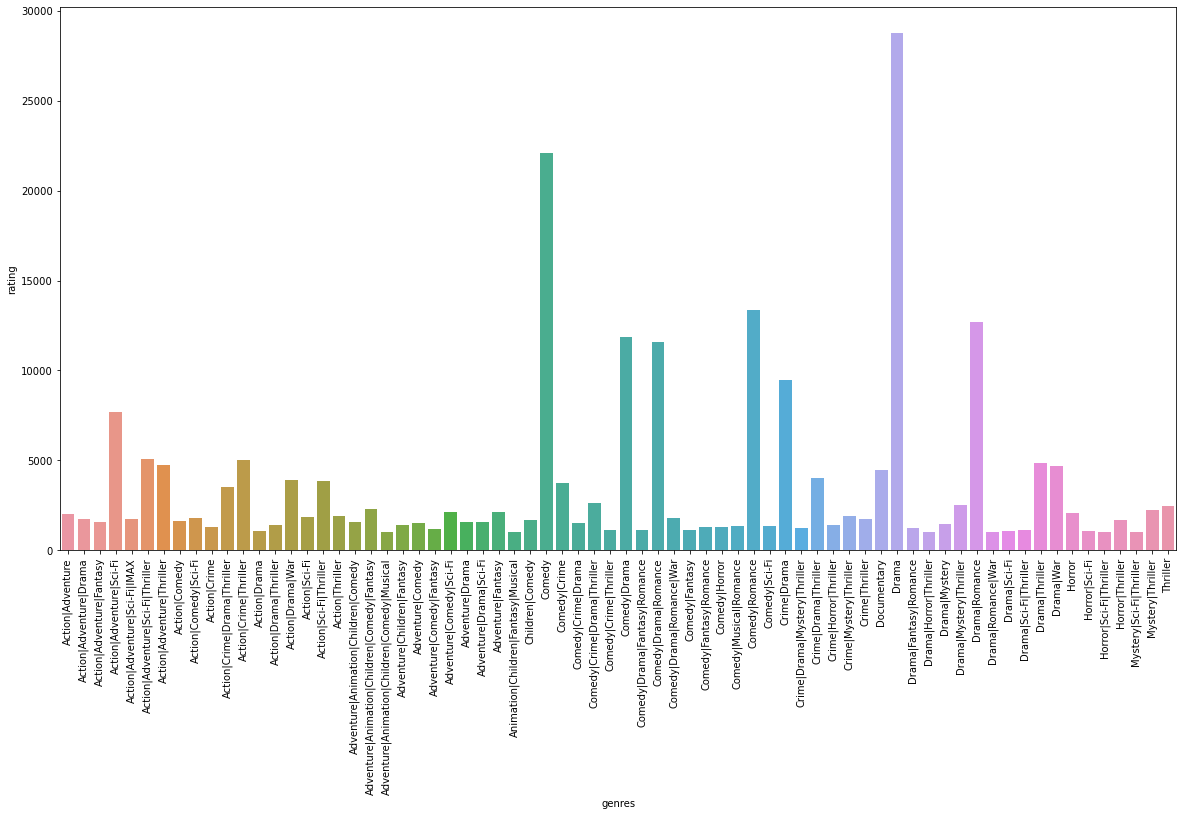

In [33]:
#Which genre has the lowest average rating?
plt.figure(figsize=(20,10))
sns.barplot(x=df5.index, y=df5.rating, data=df5)
plt.xticks(rotation=90)
plt.show()